<a id="1"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📚 IMPORTING LIBRARIES</p>

In [39]:
import pandas as pd
import numpy as np
import imblearn
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

<a id="2"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📖 LOADING DATA</p>

In [2]:
data = pd.read_csv('train.csv')
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
data.columns


Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [42]:
data.isnull().any()

id                   False
target               False
ps_ind_01            False
ps_ind_03            False
ps_ind_06_bin        False
                     ...  
ps_car_11_cat_100    False
ps_car_11_cat_101    False
ps_car_11_cat_102    False
ps_car_11_cat_103    False
ps_car_11_cat_104    False
Length: 229, dtype: bool

In [43]:
data.isnull().sum()

id                   0
target               0
ps_ind_01            0
ps_ind_03            0
ps_ind_06_bin        0
                    ..
ps_car_11_cat_100    0
ps_car_11_cat_101    0
ps_car_11_cat_102    0
ps_car_11_cat_103    0
ps_car_11_cat_104    0
Length: 229, dtype: int64

<div class="alert alert-block alert-info ;"> 📌  We do not have any null or missing data 🥳 </div>

Markdown
<a id="4"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📊 EDA</p>


In [6]:
len(data)

595212

In [7]:
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in id: 595212
Unique values in target: 2
Unique values in ps_ind_01: 8
Unique values in ps_ind_02_cat: 5
Unique values in ps_ind_03: 12
Unique values in ps_ind_04_cat: 3
Unique values in ps_ind_05_cat: 8
Unique values in ps_ind_06_bin: 2
Unique values in ps_ind_07_bin: 2
Unique values in ps_ind_08_bin: 2
Unique values in ps_ind_09_bin: 2
Unique values in ps_ind_10_bin: 2
Unique values in ps_ind_11_bin: 2
Unique values in ps_ind_12_bin: 2
Unique values in ps_ind_13_bin: 2
Unique values in ps_ind_14: 5
Unique values in ps_ind_15: 14
Unique values in ps_ind_16_bin: 2
Unique values in ps_ind_17_bin: 2
Unique values in ps_ind_18_bin: 2
Unique values in ps_reg_01: 10
Unique values in ps_reg_02: 19
Unique values in ps_reg_03: 5013
Unique values in ps_car_01_cat: 13
Unique values in ps_car_02_cat: 3
Unique values in ps_car_03_cat: 3
Unique values in ps_car_04_cat: 10
Unique values in ps_car_05_cat: 3
Unique values in ps_car_06_cat: 18
Unique values in ps_car_07_cat: 3
Unique valu

In [8]:
data.target.value_counts()

target
0    573518
1     21694
Name: count, dtype: int64

In [9]:
data.groupby('target')['id'].count() / len(data)

target
0    0.963552
1    0.036448
Name: id, dtype: float64

<Axes: xlabel='target', ylabel='count'>

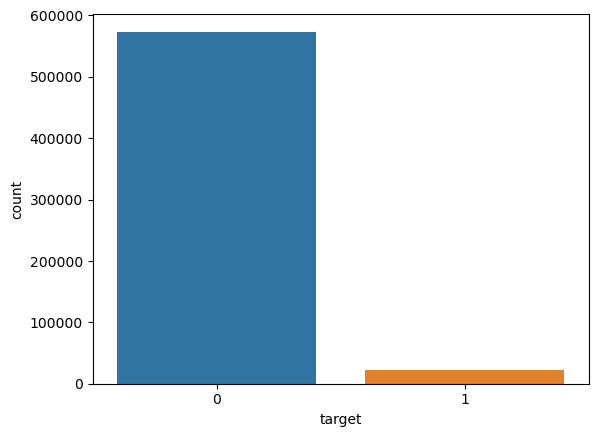

In [10]:
sns.countplot(data = data , x = 'target')

In [11]:
data.ps_calc_17_bin.value_counts()/len(data)

ps_calc_17_bin
1    0.554182
0    0.445818
Name: count, dtype: float64

In [12]:
data.ps_calc_18_bin.value_counts()/len(data)

ps_calc_18_bin
0    0.712818
1    0.287182
Name: count, dtype: float64

In [13]:
data.ps_calc_19_bin.value_counts()/len(data)

ps_calc_19_bin
0    0.650976
1    0.349024
Name: count, dtype: float64

In [14]:
data.groupby('ps_ind_01')['target'].mean()

ps_ind_01
0    0.033221
1    0.033629
2    0.036863
3    0.040963
4    0.045132
5    0.040316
6    0.043151
7    0.042131
Name: target, dtype: float64

<Axes: xlabel='ps_ind_01', ylabel='count'>

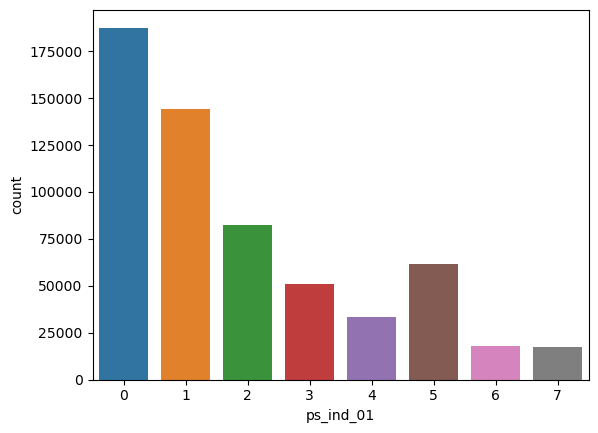

In [15]:
sns.countplot(data = data , x = 'ps_ind_01')

In [18]:
data.groupby('ps_ind_02_cat')['target'].mean()


ps_ind_02_cat
-1    0.185185
 1    0.035725
 2    0.038139
 3    0.037217
 4    0.040780
Name: target, dtype: float64

<Axes: xlabel='ps_ind_02_cat', ylabel='count'>

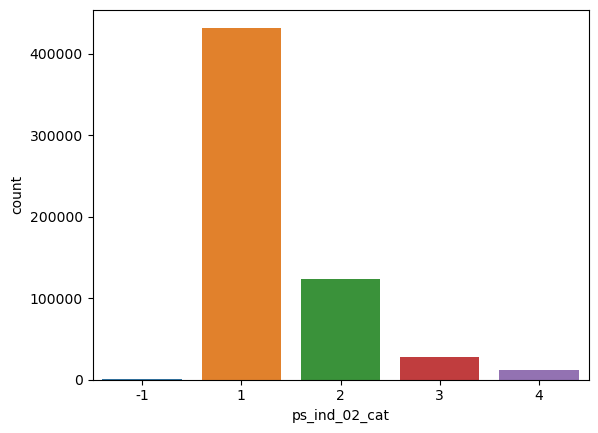

In [19]:
sns.countplot(data = data , x = 'ps_ind_02_cat')

<Axes: xlabel='ps_ind_04_cat', ylabel='count'>

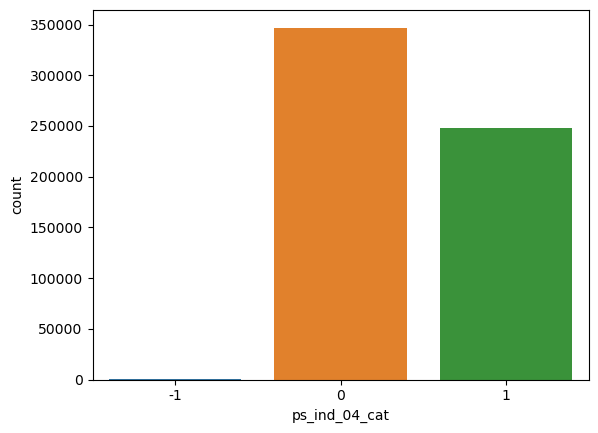

In [20]:
sns.countplot(data = data , x = 'ps_ind_04_cat')

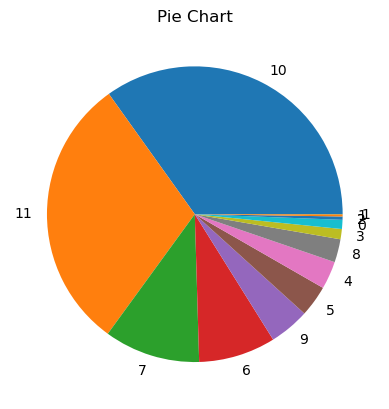

In [22]:
fig, ax = plt.subplots()
ax.pie(data['ps_car_01_cat'].value_counts(), labels=data['ps_car_01_cat'].unique())
ax.set_title('Pie Chart')
plt.show()

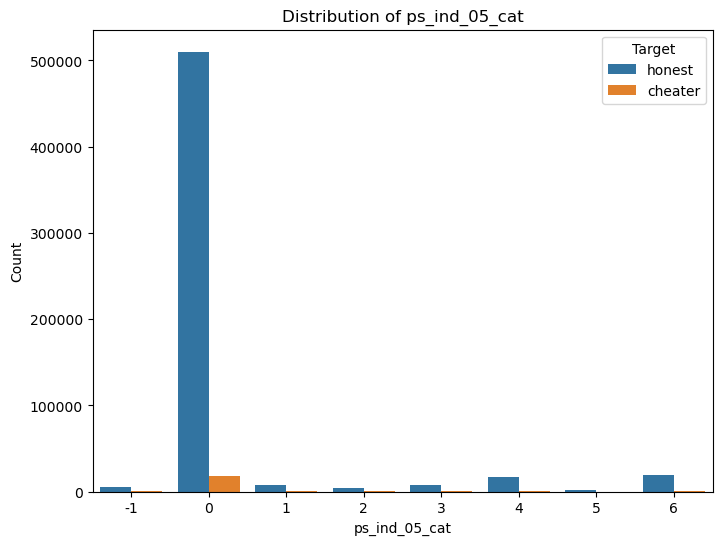

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='ps_ind_05_cat', hue='target' )
plt.title('Distribution of ps_ind_05_cat')
plt.xlabel('ps_ind_05_cat')
plt.ylabel('Count')
plt.legend(title='Target', labels=['honest', 'cheater'])
plt.show()

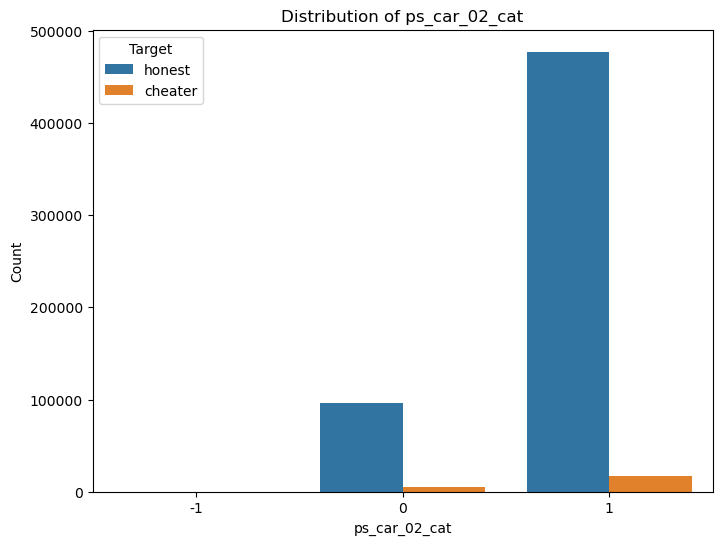

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='ps_car_02_cat', hue='target' )
plt.title('Distribution of ps_car_02_cat')
plt.xlabel('ps_car_02_cat')
plt.ylabel('Count')
plt.legend(title='Target', labels=['honest', 'cheater'])
plt.show()

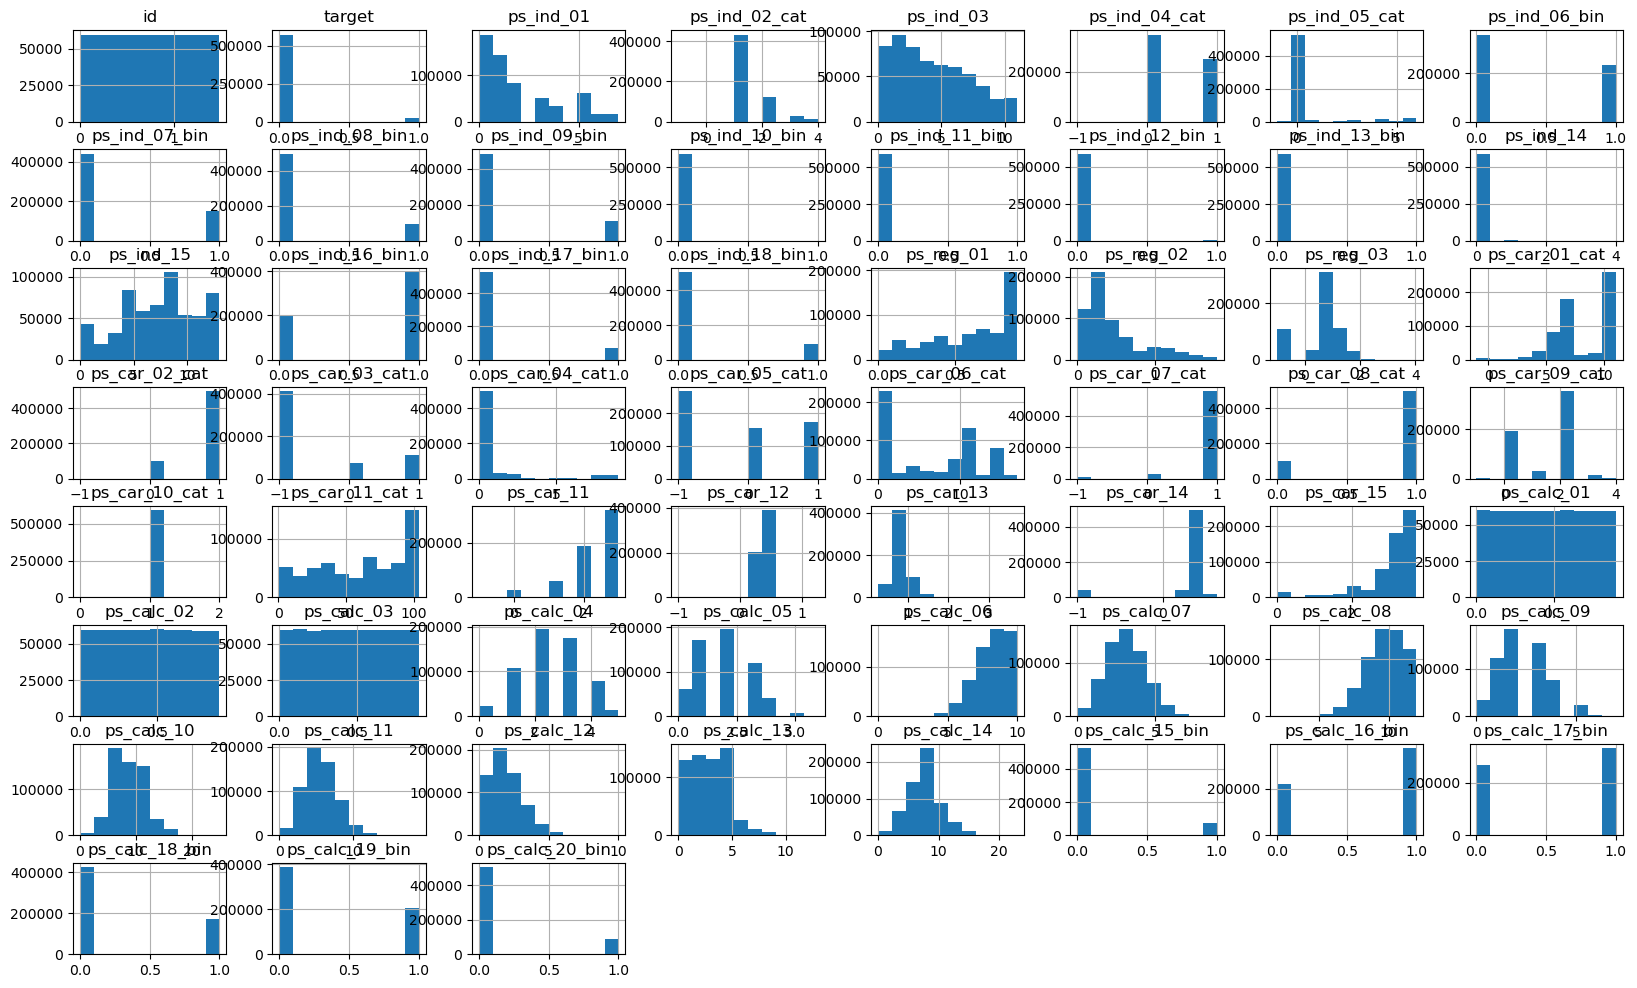

In [25]:
data.hist(figsize=(20, 12));

# OHE

In [29]:
selected_columns = data.loc[:,data.columns.str.contains("cat")]
selected_columns

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,2,1,0,10,1,-1,0,1,4,1,0,0,1,12
1,1,0,0,11,1,-1,0,-1,11,1,1,2,1,19
2,4,1,0,7,1,-1,0,-1,14,1,1,2,1,60
3,1,0,0,7,1,0,0,1,11,1,1,3,1,104
4,2,1,0,11,1,-1,0,-1,14,1,1,2,1,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1,0,0,10,1,-1,0,1,1,1,1,0,1,31
595208,1,0,0,9,1,-1,0,-1,15,0,0,2,1,63
595209,1,0,0,7,1,-1,0,-1,1,1,1,2,1,31
595210,2,1,0,11,1,-1,0,-1,11,1,1,2,1,101


In [30]:
data = pd.get_dummies(data, columns=['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat','ps_car_02_cat' ,'ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat' ,'ps_car_11_cat'], dtype=int)
data

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,7,0,2,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,1,7,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,0,5,9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,10,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
595208,1488016,0,5,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
595209,1488017,0,1,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595210,1488021,0,5,3,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<a id="6"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">✂️ SPLITING DATA</p>

In [31]:
X = data.iloc[:, 2:]
X.head()
y = data['target']


<a id="7"></a>
# <p style="background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📐 Scaling</p>


In [32]:
from sklearn.ensemble import IsolationForest

In [33]:
IF = IsolationForest(contamination=0.005)
y_pred = IF.fit_predict(X)

c:\Users\Bastani\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [34]:
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([  2977, 592235], dtype=int64))

In [35]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [36]:
from sklearn import metrics

In [37]:
y_true = data['target']

In [38]:
print(metrics.classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    573518
           1       0.09      0.01      0.02     21694

    accuracy                           0.96    595212
   macro avg       0.53      0.50      0.50    595212
weighted avg       0.93      0.96      0.94    595212

